# Milestone 4: From Victim to Defender: Using Predictive Analytics to Detect Financial Fraud

## Data Preparation Process

The dataset used in this project originates from Kaggle, containing labeled financial transactions with fraud indicators. However, a key challenge was the extreme class imbalance, only 0.13% of transactions were fraudulent. To ensure models could effectively learn from this dataset, the following preprocessing steps were implemented:

- **Encoding Categorical Variables**: Converted transaction types into numerical form using one-hot encoding.

- **Handling Class Imbalance**: Addressed using class weighting in models like Random Forest and Logistic Regression, ensuring that fraudulent transactions were not ignored during training. SMOTE was considered for future improvements but not applied in this iteration.

- **Feature Selection**: Evaluated feature importance for each model to determine which variables had the greatest impact on fraud detection.

- **Dropped Unnecessary Columns**: Removed nameOrig and nameDest since they contain unique identifiers rather than predictive information.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
df = pd.read_csv('Fraud.csv')

In [5]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

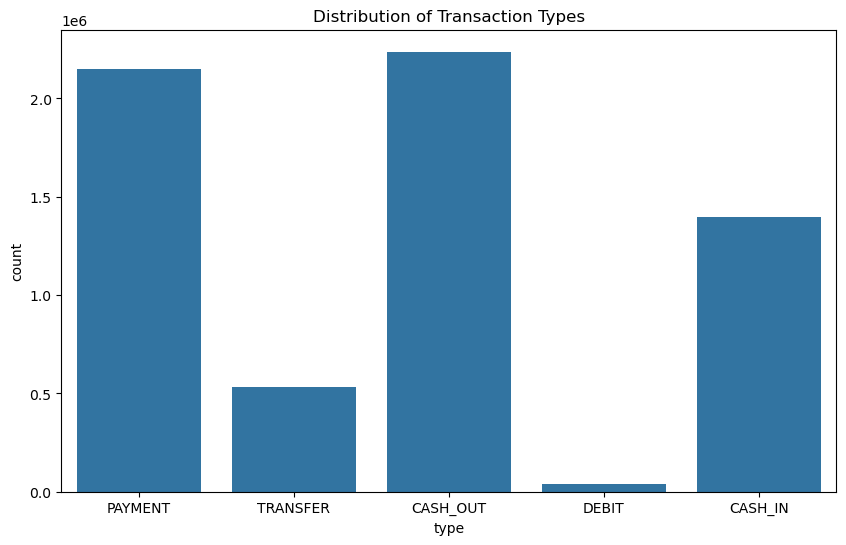

In [7]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='type') 
plt.title('Distribution of Transaction Types') 
plt.show()

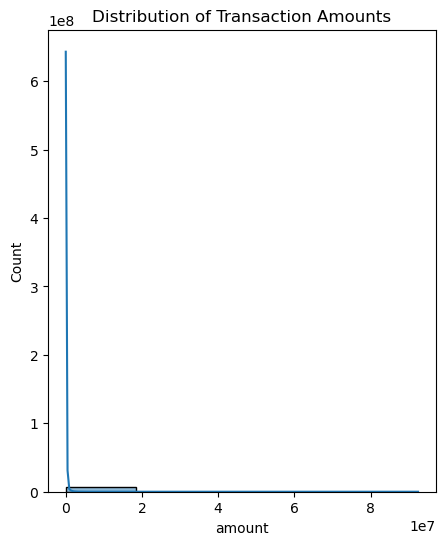

In [8]:
plt.figure(figsize=(5, 6)) 
sns.histplot(data=df, x='amount', bins=5, kde=True) 
plt.title('Distribution of Transaction Amounts') 
plt.show()

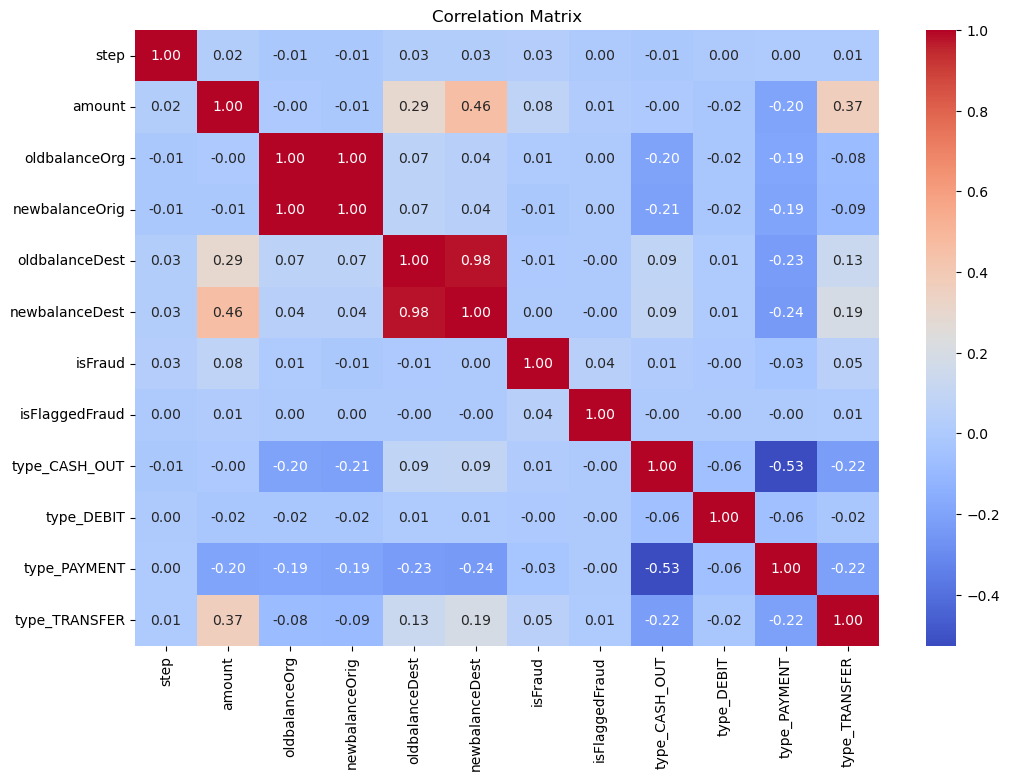

In [9]:
# Convert categorical 'type' to numerical using get_dummies
df_numerical = pd.get_dummies(df, columns=['type'], drop_first=True)

# Drop non-numeric columns if they exist in the dataset
df_numerical = df_numerical.drop(columns=['nameOrig', 'nameDest'])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Prepare data for modeling 
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] 
X = pd.get_dummies(X, columns=['type'], drop_first=True) 
# Convert categorical 'type' to numerical 
y = df['isFraud']

In [11]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Initializing a Random Forest Classifier with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)
# Train the Random Forest model using the training dataset
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Making predictions on the test dataset using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [14]:
# Printing the classification report for the Random Forest model
print('Random Forest Model:') 
print(classification_report(y_test, y_pred_rf)) 
print('=====================================================')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf)) #the confusion matrix to analyze prediction errors
print('=====================================================')
print('ROC-AUC Score:',roc_auc_score(y_test, y_pred_rf)) # and the ROC-AUC score to evaluate the model's ability to distinguish between classes

Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.78      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906267      84]
 [    524    1911]]
ROC-AUC Score: 0.8923804324461377


In [15]:
# Retrieve feature importance scores from the trained Random Forest model
importances = rf_model.feature_importances_
#get the corresponding feature names from the dataset
feature_names = X.columns 
#then create a DataFrame to organize and sort feature importance values in descending order
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

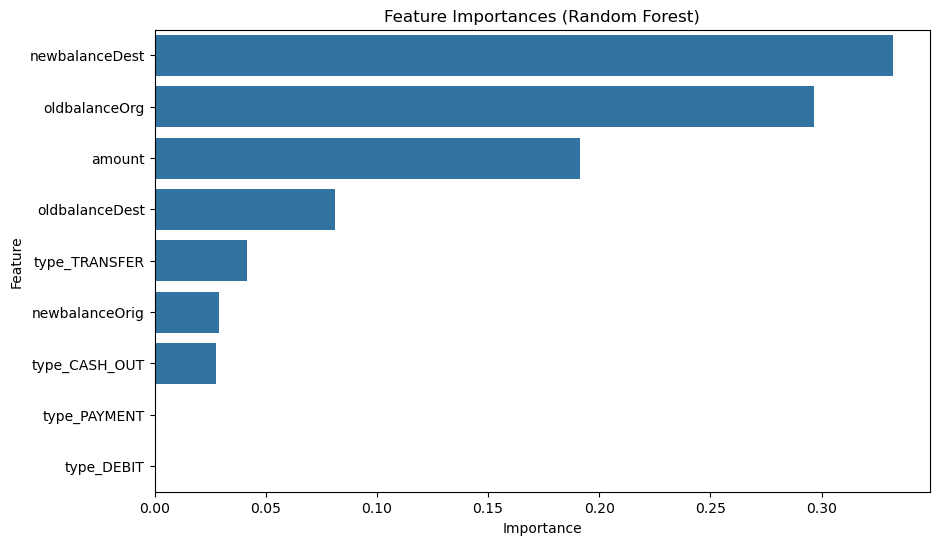

In [16]:
plt.figure(figsize=(10, 6)) 
sns.barplot(data=feature_importances, x='Importance', y='Feature') 
plt.title('Feature Importances (Random Forest)') 
plt.show()

In [17]:
# Initializing a Gradient Boosting Classifier with a fixed random state for reproducibility
gb_model = GradientBoostingClassifier(random_state=42) 
# train the model on train data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
# Making predictions on the test dataset using the trained Gradent Boost classifier model
y_pred_gb = gb_model.predict(X_test)

In [19]:
## Evaluating the model: printing model report, confusion matrix and ROC-AUC
print('Gradient Boosting Model:') 
print(classification_report(y_test, y_pred_gb)) 
print('=========================================================')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gb)) 
print('=========================================================')
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_gb))

Gradient Boosting Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.72      0.45      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.86      0.73      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1905927     424]
 [   1328    1107]]
ROC-AUC Score: 0.7271988543790483


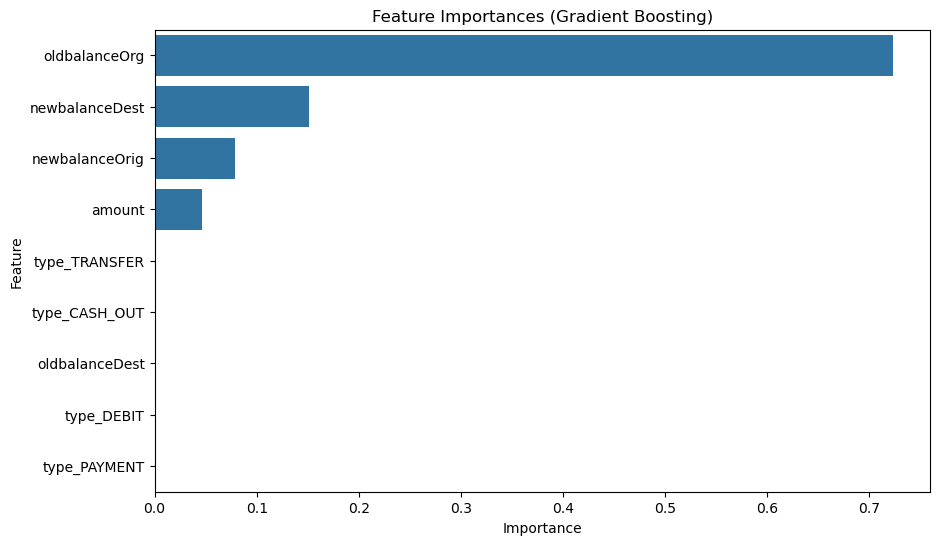

In [20]:
importances = gb_model.feature_importances_ 
feature_names = X.columns 
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False) 
plt.figure(figsize=(10, 6)) 
sns.barplot(data=feature_importances, x='Importance', y='Feature') 
plt.title('Feature Importances (Gradient Boosting)') 
plt.show()

In [21]:
# Initializin a Logistic Regression model with an increased maximum iteration limit
lr_model = LogisticRegression(max_iter=1000)
# Training the model 
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# making predicion 
y_pred_lr = lr_model.predict(X_test)

In [23]:
# evaluating
print('Logistic Regression Model:') 
print(classification_report(y_test, y_pred_lr)) 
print('========================================================')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr)) 
print('========================================================')
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_lr))

Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.46      0.61      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.73      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906220     131]
 [   1318    1117]]
ROC-AUC Score: 0.7293290908567092


In [24]:
coefficients = lr_model.coef_[0] 
feature_names = X.columns 
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients}).sort_values(by='Importance', ascending=False) 

feature_importances

,Feature,Importance
1,oldbalanceOrg,0.000036
3,oldbalanceDest,0.000005
4,newbalanceDest,-0.000006
0,amount,-0.000022
2,newbalanceOrig,-0.000040
8,type_TRANSFER,-0.011586
6,type_DEBIT,-0.076307
5,type_CASH_OUT,-0.428151
7,type_PAYMENT,-4.612423


In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

In [26]:
# Prepare data (assuming X_train, X_test, y_train, y_test are already defined)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
# Define XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)

In [28]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [ ]:
grid_search = GridSearchCV(xgb_model, param_grid, scoring="roc_auc", cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


In [30]:
# Best model
best_xgb = grid_search.best_estimator_


In [31]:
# Predict
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_proba = best_xgb.predict_proba(X_test)[:, 1]


In [32]:
# Evaluation
print("\nClassification Report (XGBoost - Optimized):")
print(classification_report(y_test, y_pred_xgb))



Classification Report (XGBoost - Optimized):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.28      0.99      0.44      2435

    accuracy                           1.00   1908786
   macro avg       0.64      0.99      0.72   1908786
weighted avg       1.00      1.00      1.00   1908786



In [33]:
roc_score_xgb = roc_auc_score(y_test, y_pred_xgb_proba)
print(f"\nROC-AUC Score (XGBoost - Optimized): {roc_score_xgb:.4f}")




ROC-AUC Score (XGBoost - Optimized): 0.9985


In [34]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix (XGBoost - Optimized):")
print(conf_matrix_xgb)


Confusion Matrix (XGBoost - Optimized):
[[1900273    6078]
 [     17    2418]]


## Interpretation of Results

Each model provided unique insights into fraud detection, balancing precision and recall differently:

- Random Forest emerged as the best overall choice, offering a strong balance between fraud detection and minimizing false positives.

- Gradient Boosting and Logistic Regression underperformed in recall, making them less effective in detecting fraud.

- XGBoost achieved near-perfect recall but at the cost of excessive false positives, making it impractical without additional tuning.

This comparative approach not only improved the final model selection but also provided a deeper understanding of how different machine learning techniques handle class imbalance and complex financial fraud patterns.

## Conclusion and Recommendations

After evaluating multiple models, Random Forest is the recommended model for fraud detection based on its ability to maintain high precision (96%) while still detecting a majority of fraud cases (78% recall). Though XGBoost detects nearly all fraudulent transactions, its high false positive rate (over 6,000 misclassified transactions) makes it unsuitable for direct deployment without further refinement.

Future improvements could include threshold tuning, SMOTE for class balancing, or an ensemble model combining Random Forest and XGBoost for enhanced fraud detection. However, based on the current results, Random Forest provides the most practical balance for real-world fraud detection while minimizing unnecessary disruptions to legitimate transactions.